In [1]:
import bs4

In [2]:
import requests

In [3]:
url='https://www.amazon.in/Yogabar-Wholegrain-Breakfast-Muesli-Fruits/product-reviews/B07M6KZQCN/ref=cm_cr_getr_d_show_all?pageNumber=1&reviewerType=all_reviews'
url_list=[url]

In [4]:
res=requests.get(url)

In [5]:
soup=bs4.BeautifulSoup(res.text,'html')

In [6]:
soup.select('title')

[<title>Amazon.in:Customer reviews: Yogabar Breakfast Cereal &amp; Muesli | 92% Fruit and Nut + Seeds + Whole-Grains | 400g</title>]

In [7]:
print(soup.prettify())

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in">
 <!-- sp:feature:head-start -->
 <head>
  <script>
   var aPageStart = (new Date()).getTime();
  </script>
  <meta charset="utf-8"/>
  <!-- sp:feature:cs-optimization -->
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
  <link href="https://m.media-amazon.com" rel="dns-prefetch"/>
  <link href="https://completion.amazon.com" rel="dns-prefetch"/>
  <!-- sp:feature:aui-assets -->
  <link href="https://images-eu.ssl-images-amazon.com/images/I/11EIQ5IGqaL._RC|012LjolmrML.css,41-crZfIjzL.css,11cMnOipjJL.css,017DsKjNQJL.css,01Vctty9pOL.css,01HEsUOLYvL.css,41EWOOlBJ9L.css,11PIM2x8KnL.css,01ElnPiDxWL.css,11QxHU4QYaL.css,01Sp8sB1HiL.css,01IdKcBuAdL.css,01y-XAlI+2L.css,01evdoiemkL.css,01K+Ps1DeEL.css,314djKvMsUL.css,01ZTetsDh7L.css,01pbA9Lg3yL.css,21LK7jaicML.css,11L58Qpo0GL.css,21kyTi1FabL.css,01ruG+gDPFL.css,01YhS3Cs-hL.css,21GwE3cR-y

In [8]:
reviews=[]

In [9]:
sections=soup.find_all('div',class_="a-section review aok-relative")

In [10]:
for section in sections:
    user_name=section.find('span',class_="a-profile-name")
    user_name=user_name.text.strip()
    star_rating=section.find('span',class_="a-icon-alt")
    star_rating=star_rating.text.strip()
    review_date=section.find('span',class_="a-size-base a-color-secondary review-date")
    review_date=review_date.text.strip()
    review_title=section.find('a',class_="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold")
    review_title=review_title.text.strip()
    size=section.find('a',class_="a-size-mini a-link-normal a-color-secondary")
    size=size.text.split(':')[-1].strip()
    review=section.find('span',class_="a-size-base review-text review-text-content")
    review=review.text.strip().replace(","," ")
    rev_page=[user_name,star_rating,review_date,review_title,size,review]
    reviews.append(rev_page)

In [11]:
link=soup.find('li',class_="a-last")
next_link=link.a.get('href')
url1='https://www.amazon.in'+next_link
url1

'https://www.amazon.in/Yogabar-Wholegrain-Breakfast-Muesli-Fruits/product-reviews/B07M6KZQCN?pageNumber=2&reviewerType=all_reviews'

In [12]:
count=1
while count<84:
    url=url1
    res=requests.get(url)
    soup=bs4.BeautifulSoup(res.text,'html')
    sections=soup.find_all('div',class_="a-section review aok-relative")
    for section in sections:
        user_name=section.find('span',class_="a-profile-name")
        user_name=user_name.text.strip()
        star_rating=section.find('span',class_="a-icon-alt")
        star_rating=star_rating.text.strip()
        review_date=section.find('span',class_="a-size-base a-color-secondary review-date")
        review_date=review_date.text.strip()
        review_title=section.find('a',class_="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold")
        review_title=review_title.text.strip()
        size=section.find('a',class_="a-size-mini a-link-normal a-color-secondary")
        size=size.text.split(':')[-1].strip()
        review=section.find('span',class_="a-size-base review-text review-text-content")
        review=review.text.strip().replace(","," ")
        rev_page=[user_name,star_rating,review_date,review_title,size,review]
        reviews.append(rev_page)
    url_list.append(url)
    link=soup.find('li',class_="a-last")
    if link is None:
        res=requests.get(url)
        soup=bs4.BeautifulSoup(res.text,'html')
        link=soup.find('li',class_="a-last")
    next_link=link.a.get('href')
    url1='https://www.amazon.in'+next_link
    print("scraping complete:"+" "+"page-"+str(count))
    count += 1
    print("Next url is:"+" "+url1)
    

scraping complete: page-1
Next url is: https://www.amazon.in/Yogabar-Wholegrain-Breakfast-Muesli-Fruits/product-reviews/B07M6KZQCN?pageNumber=3&reviewerType=all_reviews
scraping complete: page-2
Next url is: https://www.amazon.in/Yogabar-Wholegrain-Breakfast-Muesli-Fruits/product-reviews/B07M6KZQCN?pageNumber=4&reviewerType=all_reviews
scraping complete: page-3
Next url is: https://www.amazon.in/Yogabar-Wholegrain-Breakfast-Muesli-Fruits/product-reviews/B07M6KZQCN?pageNumber=5&reviewerType=all_reviews
scraping complete: page-4
Next url is: https://www.amazon.in/Yogabar-Wholegrain-Breakfast-Muesli-Fruits/product-reviews/B07M6KZQCN?pageNumber=6&reviewerType=all_reviews
scraping complete: page-5
Next url is: https://www.amazon.in/Yogabar-Wholegrain-Breakfast-Muesli-Fruits/product-reviews/B07M6KZQCN?pageNumber=7&reviewerType=all_reviews
scraping complete: page-6
Next url is: https://www.amazon.in/Yogabar-Wholegrain-Breakfast-Muesli-Fruits/product-reviews/B07M6KZQCN?pageNumber=8&reviewerTyp

AttributeError: 'NoneType' object has no attribute 'a'

In [13]:
while count<84:
    url=url1
    res=requests.get(url)
    soup=bs4.BeautifulSoup(res.text,'html')
    sections=soup.find_all('div',class_="a-section review aok-relative")
    for section in sections:
        user_name=section.find('span',class_="a-profile-name")
        user_name=user_name.text.strip()
        star_rating=section.find('span',class_="a-icon-alt")
        star_rating=star_rating.text.strip()
        review_date=section.find('span',class_="a-size-base a-color-secondary review-date")
        review_date=review_date.text.strip()
        review_title=section.find('a',class_="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold")
        review_title=review_title.text.strip()
        size=section.find('a',class_="a-size-mini a-link-normal a-color-secondary")
        size=size.text.split(':')[-1].strip()
        review=section.find('span',class_="a-size-base review-text review-text-content")
        review=review.text.strip().replace(","," ")
        rev_page=[user_name,star_rating,review_date,review_title,size,review]
        reviews.append(rev_page)
    url_list.append(url)
    link=soup.find('li',class_="a-last")
    if link is None:
        res=requests.get(url)
        soup=bs4.BeautifulSoup(res.text,'html')
        link=soup.find('li',class_="a-last")
    next_link=link.a.get('href')
    url1='https://www.amazon.in'+next_link
    print("scraping complete:"+" "+"page-"+str(count))
    count += 1
    print("Next url is:"+" "+url1)
    

scraping complete: page-8
Next url is: https://www.amazon.in/Yogabar-Wholegrain-Breakfast-Muesli-Fruits/product-reviews/B07M6KZQCN?pageNumber=10&reviewerType=all_reviews
scraping complete: page-9
Next url is: https://www.amazon.in/Yogabar-Wholegrain-Breakfast-Muesli-Fruits/product-reviews/B07M6KZQCN?pageNumber=11&reviewerType=all_reviews
scraping complete: page-10
Next url is: https://www.amazon.in/Yogabar-Wholegrain-Breakfast-Muesli-Fruits/product-reviews/B07M6KZQCN?pageNumber=12&reviewerType=all_reviews
scraping complete: page-11
Next url is: https://www.amazon.in/Yogabar-Wholegrain-Breakfast-Muesli-Fruits/product-reviews/B07M6KZQCN?pageNumber=13&reviewerType=all_reviews
scraping complete: page-12
Next url is: https://www.amazon.in/Yogabar-Wholegrain-Breakfast-Muesli-Fruits/product-reviews/B07M6KZQCN?pageNumber=14&reviewerType=all_reviews
scraping complete: page-13
Next url is: https://www.amazon.in/Yogabar-Wholegrain-Breakfast-Muesli-Fruits/product-reviews/B07M6KZQCN?pageNumber=15&r

In [18]:
reviews

[['Pooja Devlekar',
  '5.0 out of 5 stars',
  'Reviewed in India on 28 January 2019',
  'Amazing product 👌',
  'Single Pack',
  "It's very tasty and affordable and filled with all the goodies needed for your diet"],
 ['Z',
  '5.0 out of 5 stars',
  'Reviewed in India on 2 February 2019',
  'Wow!',
  'Single Pack',
  'I really want to applaud the ppl at yogabar who come up with such great combinations  the perfect taste  they have mastered the art of what will taste the best with what. I’m so happy with all the ingredients and how they complement each other and taste great with milk/yoghurt! Best buy!'],
 ['mum_n_kiddos',
  '5.0 out of 5 stars',
  'Reviewed in India on 1 March 2019',
  'Awesome taste and a healthy breakfast option',
  'Single Pack',
  'Morning breakfast is now easy with this delicious crunchy muesli. Me being a fruits and nuts lover  loved it and it has all berries  which gives awesome taste. All healthy ingredients like oats  brown rice flakes  raisins  cranberries  ap

In [19]:
reviews_copy=reviews

In [21]:
len(reviews)

680

In [168]:
import pandas as pd
columns=['user_name','star_rating','date_of_review','review_title','size','review']
df1 = pd.DataFrame(reviews, columns=['user_name','star_rating','date_of_review','review_title','size','review'])

In [169]:
df1.head()

,user_name,star_rating,date_of_review,review_title,size,review
0,Pooja Devlekar,5.0 out of 5 stars,Reviewed in India on 28 January 2019,Amazing product 👌,Single Pack,It's very tasty and affordable and filled with...
1,Z,5.0 out of 5 stars,Reviewed in India on 2 February 2019,Wow!,Single Pack,I really want to applaud the ppl at yogabar wh...
2,mum_n_kiddos,5.0 out of 5 stars,Reviewed in India on 1 March 2019,Awesome taste and a healthy breakfast option,Single Pack,Morning breakfast is now easy with this delici...
3,Shiv Shankar Ash,2.0 out of 5 stars,Reviewed in India on 16 February 2020,Disappointing purchase.,Super Saver Pack,I'm a big fan of Yogabar range of Mueslis and ...
4,Siddharth,1.0 out of 5 stars,Reviewed in India on 24 September 2019,Cheating customers,Single Pack,Quality of product has deteriorated badly. The...


In [170]:
df1.shape

(680, 6)

In [171]:
df1.describe()

,user_name,star_rating,date_of_review,review_title,size,review
count,680,680,680,680,680,680
unique,603,5,349,525,3,641
top,Amazon Customer,5.0 out of 5 stars,Reviewed in India on 4 November 2019,Good,Single Pack,Good
freq,58,443,8,30,530,12


In [227]:
df=df1.copy()
for i in range(len(df['star_rating'])):
    df['star_rating'][i]=df['star_rating'][i].split()[0]

In [228]:
df.head()

,user_name,star_rating,date_of_review,review_title,size,review
0,Pooja Devlekar,5.0,Reviewed in India on 28 January 2019,Amazing product 👌,Single Pack,It's very tasty and affordable and filled with...
1,Z,5.0,Reviewed in India on 2 February 2019,Wow!,Single Pack,I really want to applaud the ppl at yogabar wh...
2,mum_n_kiddos,5.0,Reviewed in India on 1 March 2019,Awesome taste and a healthy breakfast option,Single Pack,Morning breakfast is now easy with this delici...
3,Shiv Shankar Ash,2.0,Reviewed in India on 16 February 2020,Disappointing purchase.,Super Saver Pack,I'm a big fan of Yogabar range of Mueslis and ...
4,Siddharth,1.0,Reviewed in India on 24 September 2019,Cheating customers,Single Pack,Quality of product has deteriorated badly. The...


In [229]:
df.iloc[1,5]

'I really want to applaud the ppl at yogabar who come up with such great combinations  the perfect taste  they have mastered the art of what will taste the best with what. I’m so happy with all the ingredients and how they complement each other and taste great with milk/yoghurt! Best buy!'

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 6 columns):
user_name         680 non-null object
star_rating       680 non-null object
date_of_review    680 non-null object
review_title      680 non-null object
size              680 non-null object
review            680 non-null object
dtypes: object(6)
memory usage: 32.0+ KB


In [231]:
df.review

0      It's very tasty and affordable and filled with...
1      I really want to applaud the ppl at yogabar wh...
2      Morning breakfast is now easy with this delici...
3      I'm a big fan of Yogabar range of Mueslis and ...
4      Quality of product has deteriorated badly. The...
                             ...                        
675    Recommended product for those who care about t...
676    Yummy. I tried 2 variety of yogabar muesli  an...
677                       Quality product but expensive.
678                                  World-class product
679                    I loved it! Tastes amazing!!!♥️✌️
Name: review, Length: 680, dtype: object

In [232]:
df['star_rating']=pd.to_numeric(df['star_rating'])

In [233]:
for i in range(len(df['date_of_review'])):
    x=df['date_of_review'][i].split()[-3:]
    df['date_of_review'][i]=' '.join(x)

C:\Users\HP Pavilion\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [234]:
df.head()

,user_name,star_rating,date_of_review,review_title,size,review
0,Pooja Devlekar,5.0,28 January 2019,Amazing product 👌,Single Pack,It's very tasty and affordable and filled with...
1,Z,5.0,2 February 2019,Wow!,Single Pack,I really want to applaud the ppl at yogabar wh...
2,mum_n_kiddos,5.0,1 March 2019,Awesome taste and a healthy breakfast option,Single Pack,Morning breakfast is now easy with this delici...
3,Shiv Shankar Ash,2.0,16 February 2020,Disappointing purchase.,Super Saver Pack,I'm a big fan of Yogabar range of Mueslis and ...
4,Siddharth,1.0,24 September 2019,Cheating customers,Single Pack,Quality of product has deteriorated badly. The...


In [235]:
x=df['star_rating'].value_counts()
x.index

Float64Index([5.0, 4.0, 1.0, 3.0, 2.0], dtype='float64')

Text(0.5, 1.0, 'star_rating_distribution')

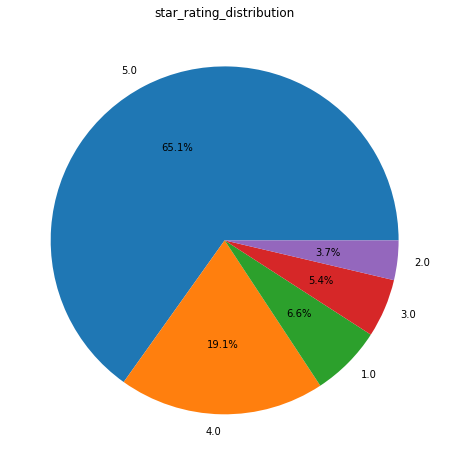

In [236]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8,8))
ax=plt.pie(x,labels=x.index,autopct = '%1.1f%%')
plt.title('star_rating_distribution')


In [239]:
df.to_excel('reviews_Amitsingh.xlsx')

In [184]:
from datetime import datetime
for i in range(len(df['date_of_review'])):
    df['date_of_review'][i]=datetime.strptime(df['date_of_review'][i],"%d %B %Y").strftime('%Y-%m-%d')
    

C:\Users\HP Pavilion\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [214]:
df['date_of_review'] = pd.to_datetime(df['date_of_review'], format='%Y-%m-%d')

In [215]:
type(df['date_of_review'][1])

pandas._libs.tslibs.timestamps.Timestamp

In [1]:
df.to_csv('reviews_by_Amitsingh.csv')

NameError: name 'df' is not defined

In [226]:
df.to_excel('reviews_by_Amitsingh.xlsx')